# Router Benchmark Analysis

Analysis of model selection and performance data from the Mind Maestro router benchmark dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

# Set plot style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading & Overview

In [2]:
# Load the dataset
df = pd.read_csv('mind_maestro/data/routerbench_with_model_selections.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df):,}")
print("\nColumns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Shape: (36179, 8)
Total Records: 36,179

Columns:
1. prompt
2. prompt_id
3. source
4. complexity_estimate
5. selected_model
6. model_description_vector
7. dynamic_parameters
8. actual_processing_time_ms


In [3]:
# Display basic info and sample rows
print("Dataset Info:")
df.info()

print("\nFirst few rows:")
df[['prompt_id', 'complexity_estimate', 'selected_model', 'actual_processing_time_ms']].head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36179 entries, 0 to 36178
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prompt                     36179 non-null  object 
 1   prompt_id                  36179 non-null  object 
 2   source                     36179 non-null  object 
 3   complexity_estimate        36179 non-null  object 
 4   selected_model             36179 non-null  object 
 5   model_description_vector   36179 non-null  object 
 6   dynamic_parameters         36179 non-null  object 
 7   actual_processing_time_ms  36179 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.2+ MB

First few rows:


,prompt_id,complexity_estimate,selected_model,actual_processing_time_ms
0,eng_00000,complex,GPT-4o,88.336221
1,eng_00001,complex,GPT-4o,54.954402
2,eng_00002,complex,o1-preview,166.595365
3,eng_00003,complex,Claude-3.5-Sonnet,139.134606
4,eng_00004,complex,GPT-4o,148.464339


## 2. Model Selection Analysis

In [4]:
# Model distribution
model_counts = df['selected_model'].value_counts()
print("Model Selection Distribution:")
for model, count in model_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{model}: {count:,} ({percentage:.1f}%)")

Model Selection Distribution:
GPT-4o: 12,126 (33.5%)
Claude-3.5-Sonnet: 9,218 (25.5%)
Gemini-1.5-Pro: 5,826 (16.1%)
o1-preview: 5,586 (15.4%)
DeepSeek-R1: 3,320 (9.2%)
Qwen2.5-72B: 103 (0.3%)


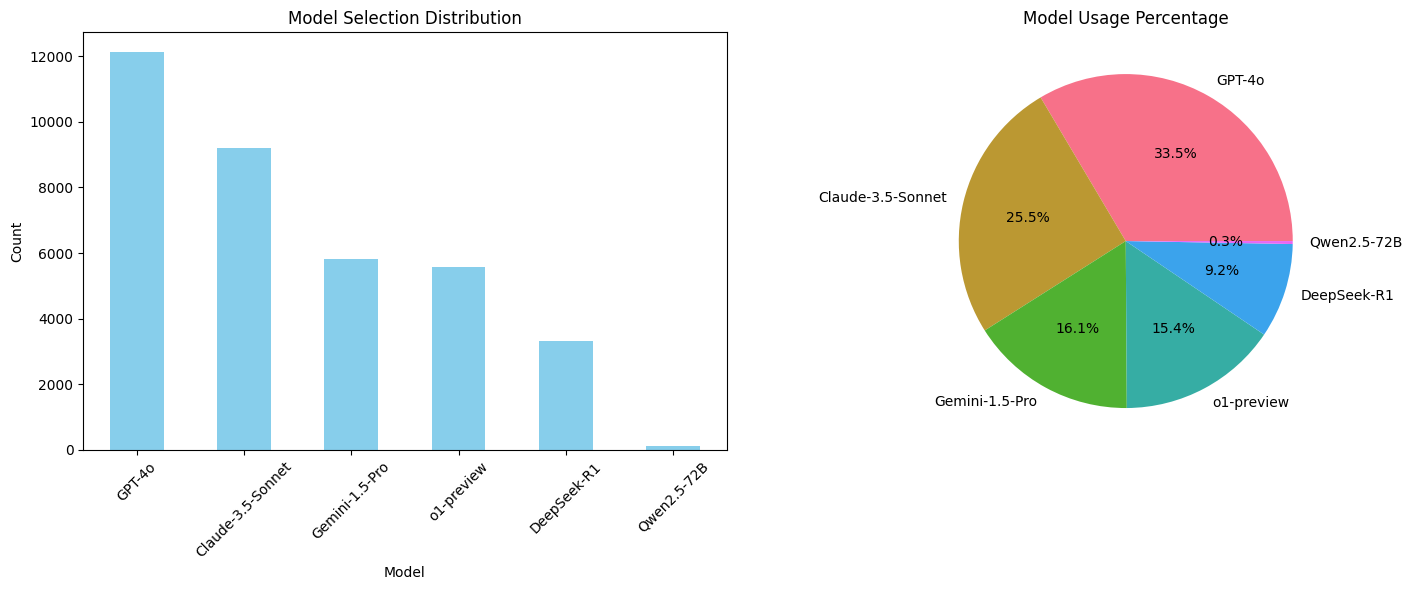

In [5]:
# Visualization: Model distribution bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
model_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model Selection Distribution')
ax1.set_xlabel('Model')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
model_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Model Usage Percentage')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Processing Time Performance Analysis

In [6]:
# Processing time statistics by model
time_stats = df.groupby('selected_model')['actual_processing_time_ms'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

time_stats = time_stats.sort_values('mean')
print("Processing Time Statistics by Model (ms):")
print(time_stats)

Processing Time Statistics by Model (ms):
                   count    mean  median    std    min     max
selected_model                                                
DeepSeek-R1         3320  172.90  174.60  71.97  50.02  299.83
o1-preview          5586  174.78  174.48  72.03  50.00  299.97
GPT-4o             12126  174.97  175.57  72.29  50.02  299.98
Claude-3.5-Sonnet   9218  175.66  176.29  72.45  50.00  300.00
Gemini-1.5-Pro      5826  175.73  175.66  72.29  50.06  299.98
Qwen2.5-72B          103  180.86  192.09  73.24  51.39  296.96


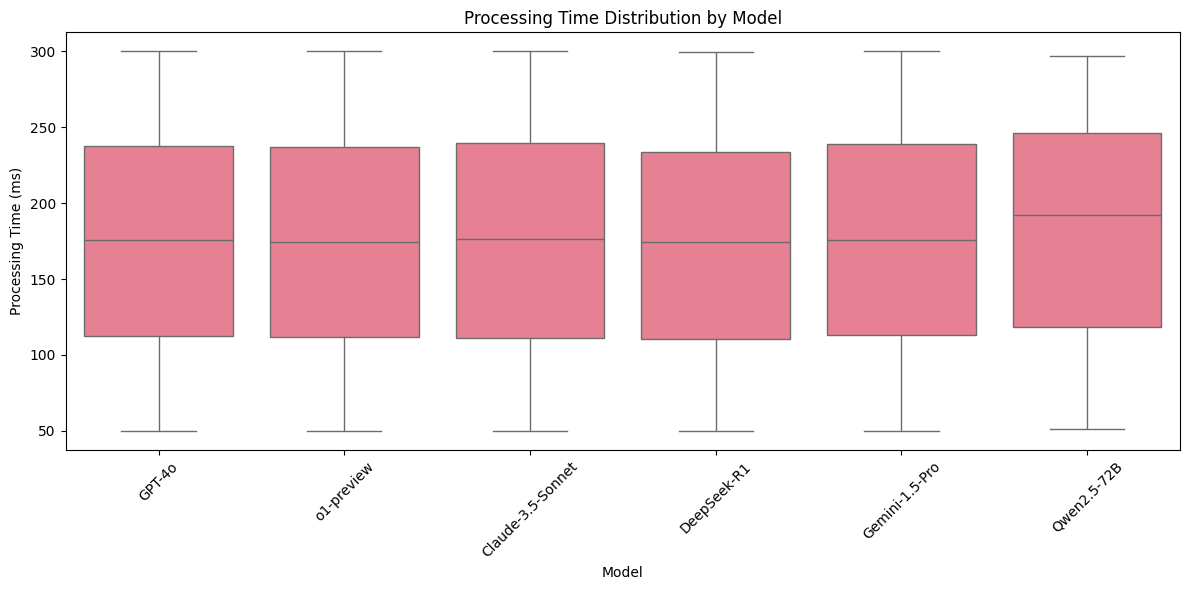

In [7]:
# Box plot of processing times by model
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='selected_model', y='actual_processing_time_ms')
plt.title('Processing Time Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Processing Time (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

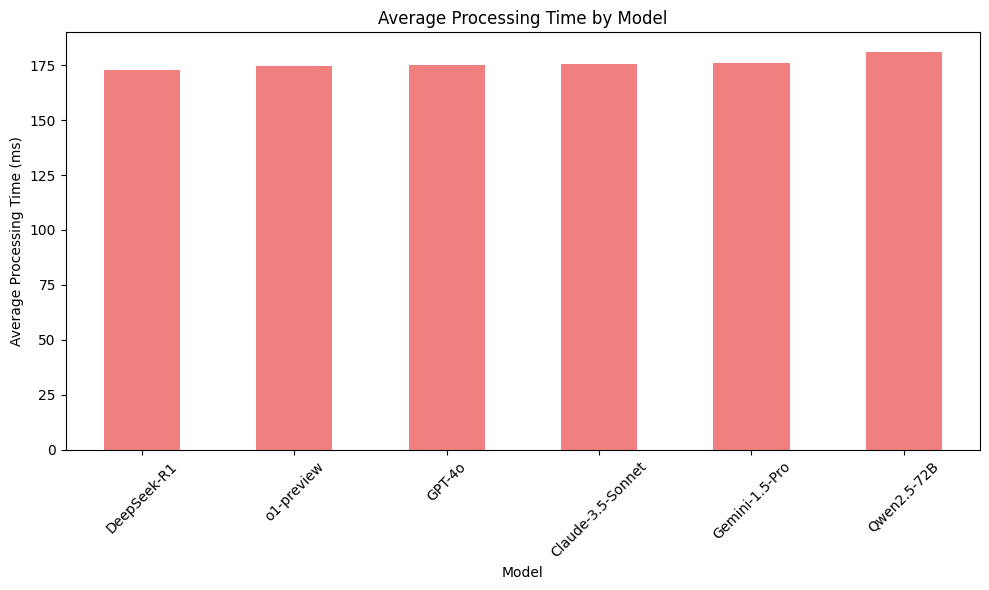


Fastest to Slowest Models (avg processing time):
DeepSeek-R1: 172.9 ms
o1-preview: 174.8 ms
GPT-4o: 175.0 ms
Claude-3.5-Sonnet: 175.7 ms
Gemini-1.5-Pro: 175.7 ms
Qwen2.5-72B: 180.9 ms


In [8]:
# Average processing time by model (bar chart)
avg_times = df.groupby('selected_model')['actual_processing_time_ms'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_times.plot(kind='bar', color='lightcoral')
plt.title('Average Processing Time by Model')
plt.xlabel('Model')
plt.ylabel('Average Processing Time (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nFastest to Slowest Models (avg processing time):")
for model, time in avg_times.items():
    print(f"{model}: {time:.1f} ms")

## 4. Complexity Analysis

Complexity Distribution:
complex: 23,148 (64.0%)
medium: 12,845 (35.5%)
simple: 186 (0.5%)


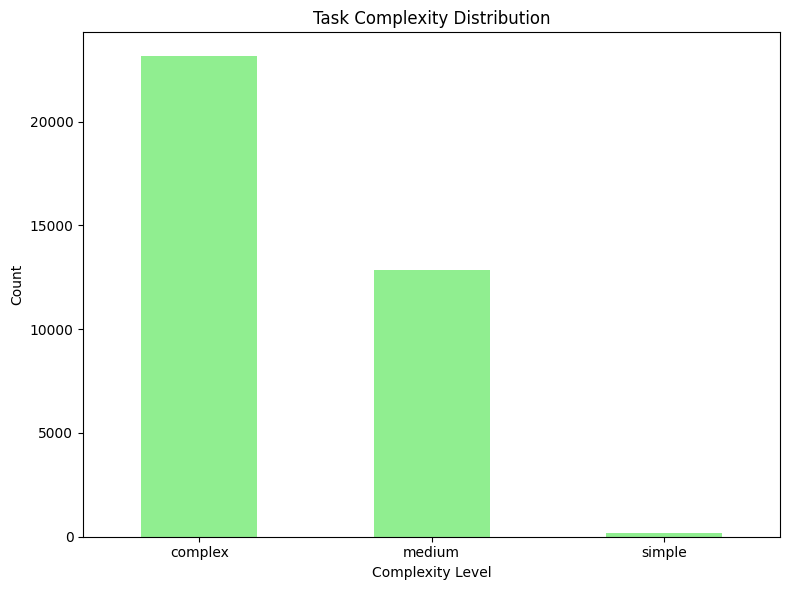

In [9]:
# Complexity distribution
complexity_counts = df['complexity_estimate'].value_counts()
print("Complexity Distribution:")
for complexity, count in complexity_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{complexity}: {count:,} ({percentage:.1f}%)")

# Visualization
plt.figure(figsize=(8, 6))
complexity_counts.plot(kind='bar', color='lightgreen')
plt.title('Task Complexity Distribution')
plt.xlabel('Complexity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Processing Time by Complexity Level:
                     count    mean  median    std
complexity_estimate                              
complex              23148  174.36  174.67  72.25
medium               12845  176.38  176.77  72.22
simple                 186  172.78  172.16  75.56


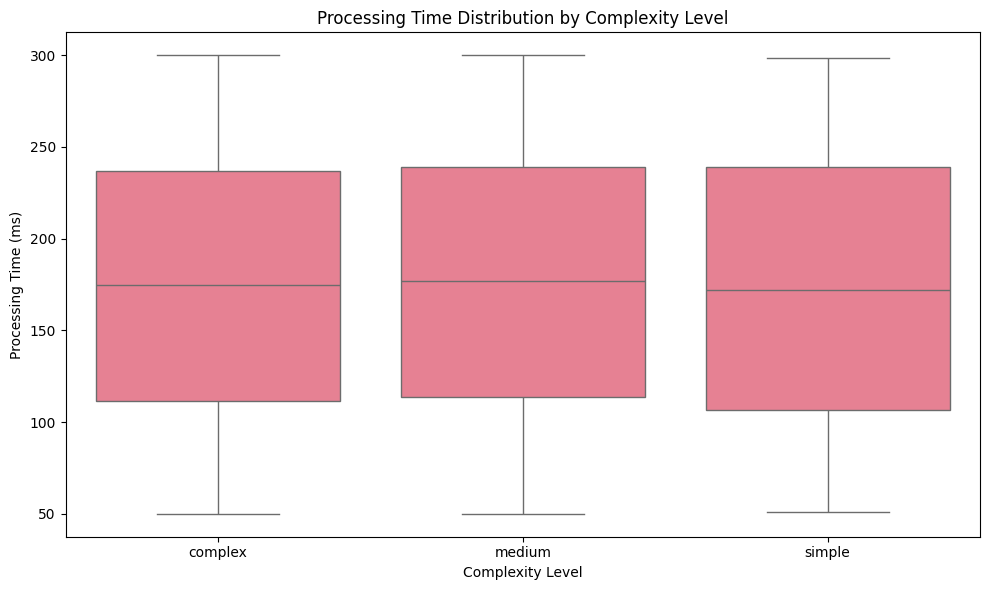

In [10]:
# Processing time by complexity level
complexity_time = df.groupby('complexity_estimate')['actual_processing_time_ms'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)

print("Processing Time by Complexity Level:")
print(complexity_time)

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='complexity_estimate', y='actual_processing_time_ms')
plt.title('Processing Time Distribution by Complexity Level')
plt.xlabel('Complexity Level')
plt.ylabel('Processing Time (ms)')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

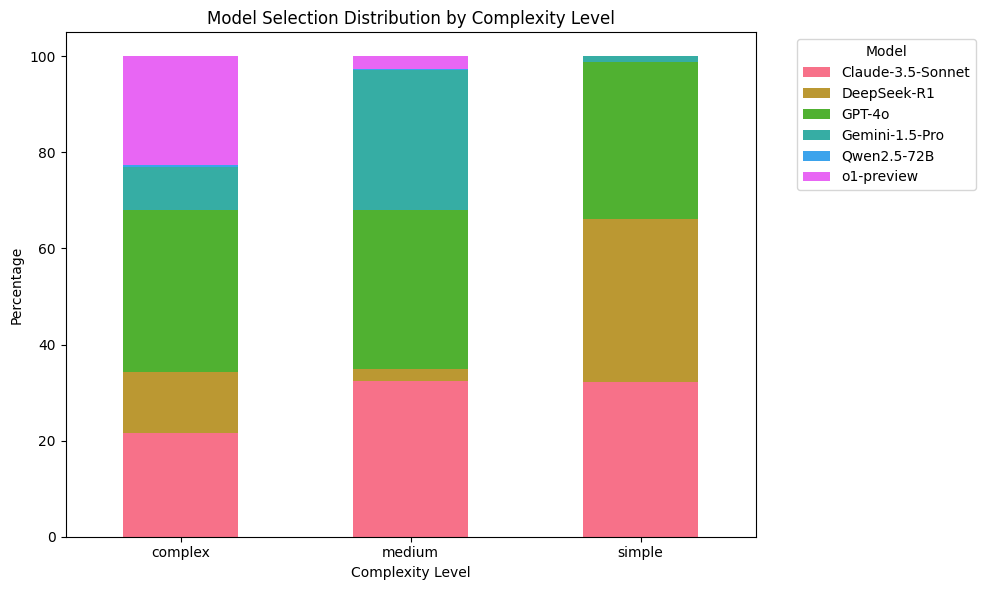

In [11]:
# Model selection by complexity
complexity_model = pd.crosstab(df['complexity_estimate'], df['selected_model'], normalize='index') * 100

plt.figure(figsize=(12, 6))
complexity_model.plot(kind='bar', stacked=True)
plt.title('Model Selection Distribution by Complexity Level')
plt.xlabel('Complexity Level')
plt.ylabel('Percentage')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Quick Insights Summary

In [12]:
# Key insights
print("=== ROUTER BENCHMARK INSIGHTS ===")
print(f"\n📊 Dataset Overview:")
print(f"   • Total routing decisions: {len(df):,}")
print(f"   • Models evaluated: {df['selected_model'].nunique()}")
print(f"   • Complexity levels: {df['complexity_estimate'].nunique()}")

print(f"\n🏆 Most Popular Models:")
for i, (model, count) in enumerate(model_counts.head(3).items(), 1):
    pct = (count / len(df)) * 100
    print(f"   {i}. {model}: {count:,} ({pct:.1f}%)")

print(f"\n⚡ Processing Performance:")
fastest = avg_times.index[0]
slowest = avg_times.index[-1]
print(f"   • Fastest model: {fastest} ({avg_times[fastest]:.1f} ms avg)")
print(f"   • Slowest model: {slowest} ({avg_times[slowest]:.1f} ms avg)")
print(f"   • Overall average: {df['actual_processing_time_ms'].mean():.1f} ms")

print(f"\n🎯 Complexity Patterns:")
for complexity in complexity_time.index:
    avg_time = complexity_time.loc[complexity, 'mean']
    count = complexity_time.loc[complexity, 'count']
    print(f"   • {complexity}: {count:,} tasks, {avg_time:.1f} ms avg")

print(f"\n💡 Key Findings:")
print(f"   • {model_counts.index[0]} is the most frequently selected model")
print(f"   • {avg_times.index[0]} offers the fastest processing times")
dominant_complexity = complexity_counts.index[0]
print(f"   • Most tasks are classified as '{dominant_complexity}' complexity")
speed_diff = avg_times.iloc[-1] / avg_times.iloc[0]
print(f"   • Slowest model is {speed_diff:.1f}x slower than fastest")

=== ROUTER BENCHMARK INSIGHTS ===

📊 Dataset Overview:
   • Total routing decisions: 36,179
   • Models evaluated: 6
   • Complexity levels: 3

🏆 Most Popular Models:
   1. GPT-4o: 12,126 (33.5%)
   2. Claude-3.5-Sonnet: 9,218 (25.5%)
   3. Gemini-1.5-Pro: 5,826 (16.1%)

⚡ Processing Performance:
   • Fastest model: DeepSeek-R1 (172.9 ms avg)
   • Slowest model: Qwen2.5-72B (180.9 ms avg)
   • Overall average: 175.1 ms

🎯 Complexity Patterns:
   • complex: 23,148 tasks, 174.4 ms avg
   • medium: 12,845 tasks, 176.4 ms avg
   • simple: 186 tasks, 172.8 ms avg

💡 Key Findings:
   • GPT-4o is the most frequently selected model
   • DeepSeek-R1 offers the fastest processing times
   • Most tasks are classified as 'complex' complexity
   • Slowest model is 1.0x slower than fastest
